# Import necessary libraries


In [1]:
import random
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

 # Set Up Random Seed and Load Initial Dataset

In [2]:
id_1 = 7361
id_2 = 7371
id_3 = 7501
random_seed = id_1 + id_2 + id_3
random.seed(random_seed)

# Load the complete dataset and select a subset for analysis
data_path = "Data.csv"
output_path = "your_data.csv"

# Load the complete dataset
all_data = pd.read_csv(data_path, index_col=0)
all_columns = all_data.columns.tolist()

# Define the target column
target_column = 'smoking'

# Select 10 random columns and create a sample dataset
selected_columns = random.sample(all_columns, 10)
selected_columns = np.append(selected_columns, target_column)
sample_df = all_data[selected_columns].copy()
sample_df.to_csv(output_path)

# Load Sample Dataset and Split into Train-Valid-Test

In [3]:
# Load the selected dataset
data_path = 'your_data.csv'
df = pd.read_csv(data_path, index_col=0)

# Set the target column
target_column = 'smoking'

# Split the data into training, validation, and test sets
X = df.drop(target_column, axis=1)
y = df[target_column]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# # Save the split datasets to separate CSV files
# train_path = 'train_data.csv'
# valid_path = 'valid_data.csv'
# test_path = 'test_data.csv'

y_train = y.loc[X_train.index]
y_valid = y.loc[X_valid.index]
y_test = y.loc[X_test.index]

# X_train.to_csv(train_path, index=False)
# X_valid.to_csv(valid_path, index=False)
# X_test.to_csv(test_path, index=False)

# Display the shapes of the split datasets
print("Train set shape:", X_train.shape)
print("Validation set shape:", X_valid.shape)
print("Test set shape:", X_test.shape)

Train set shape: (111479, 10)
Validation set shape: (23888, 10)
Test set shape: (23889, 10)


# Univariate Analysis Function

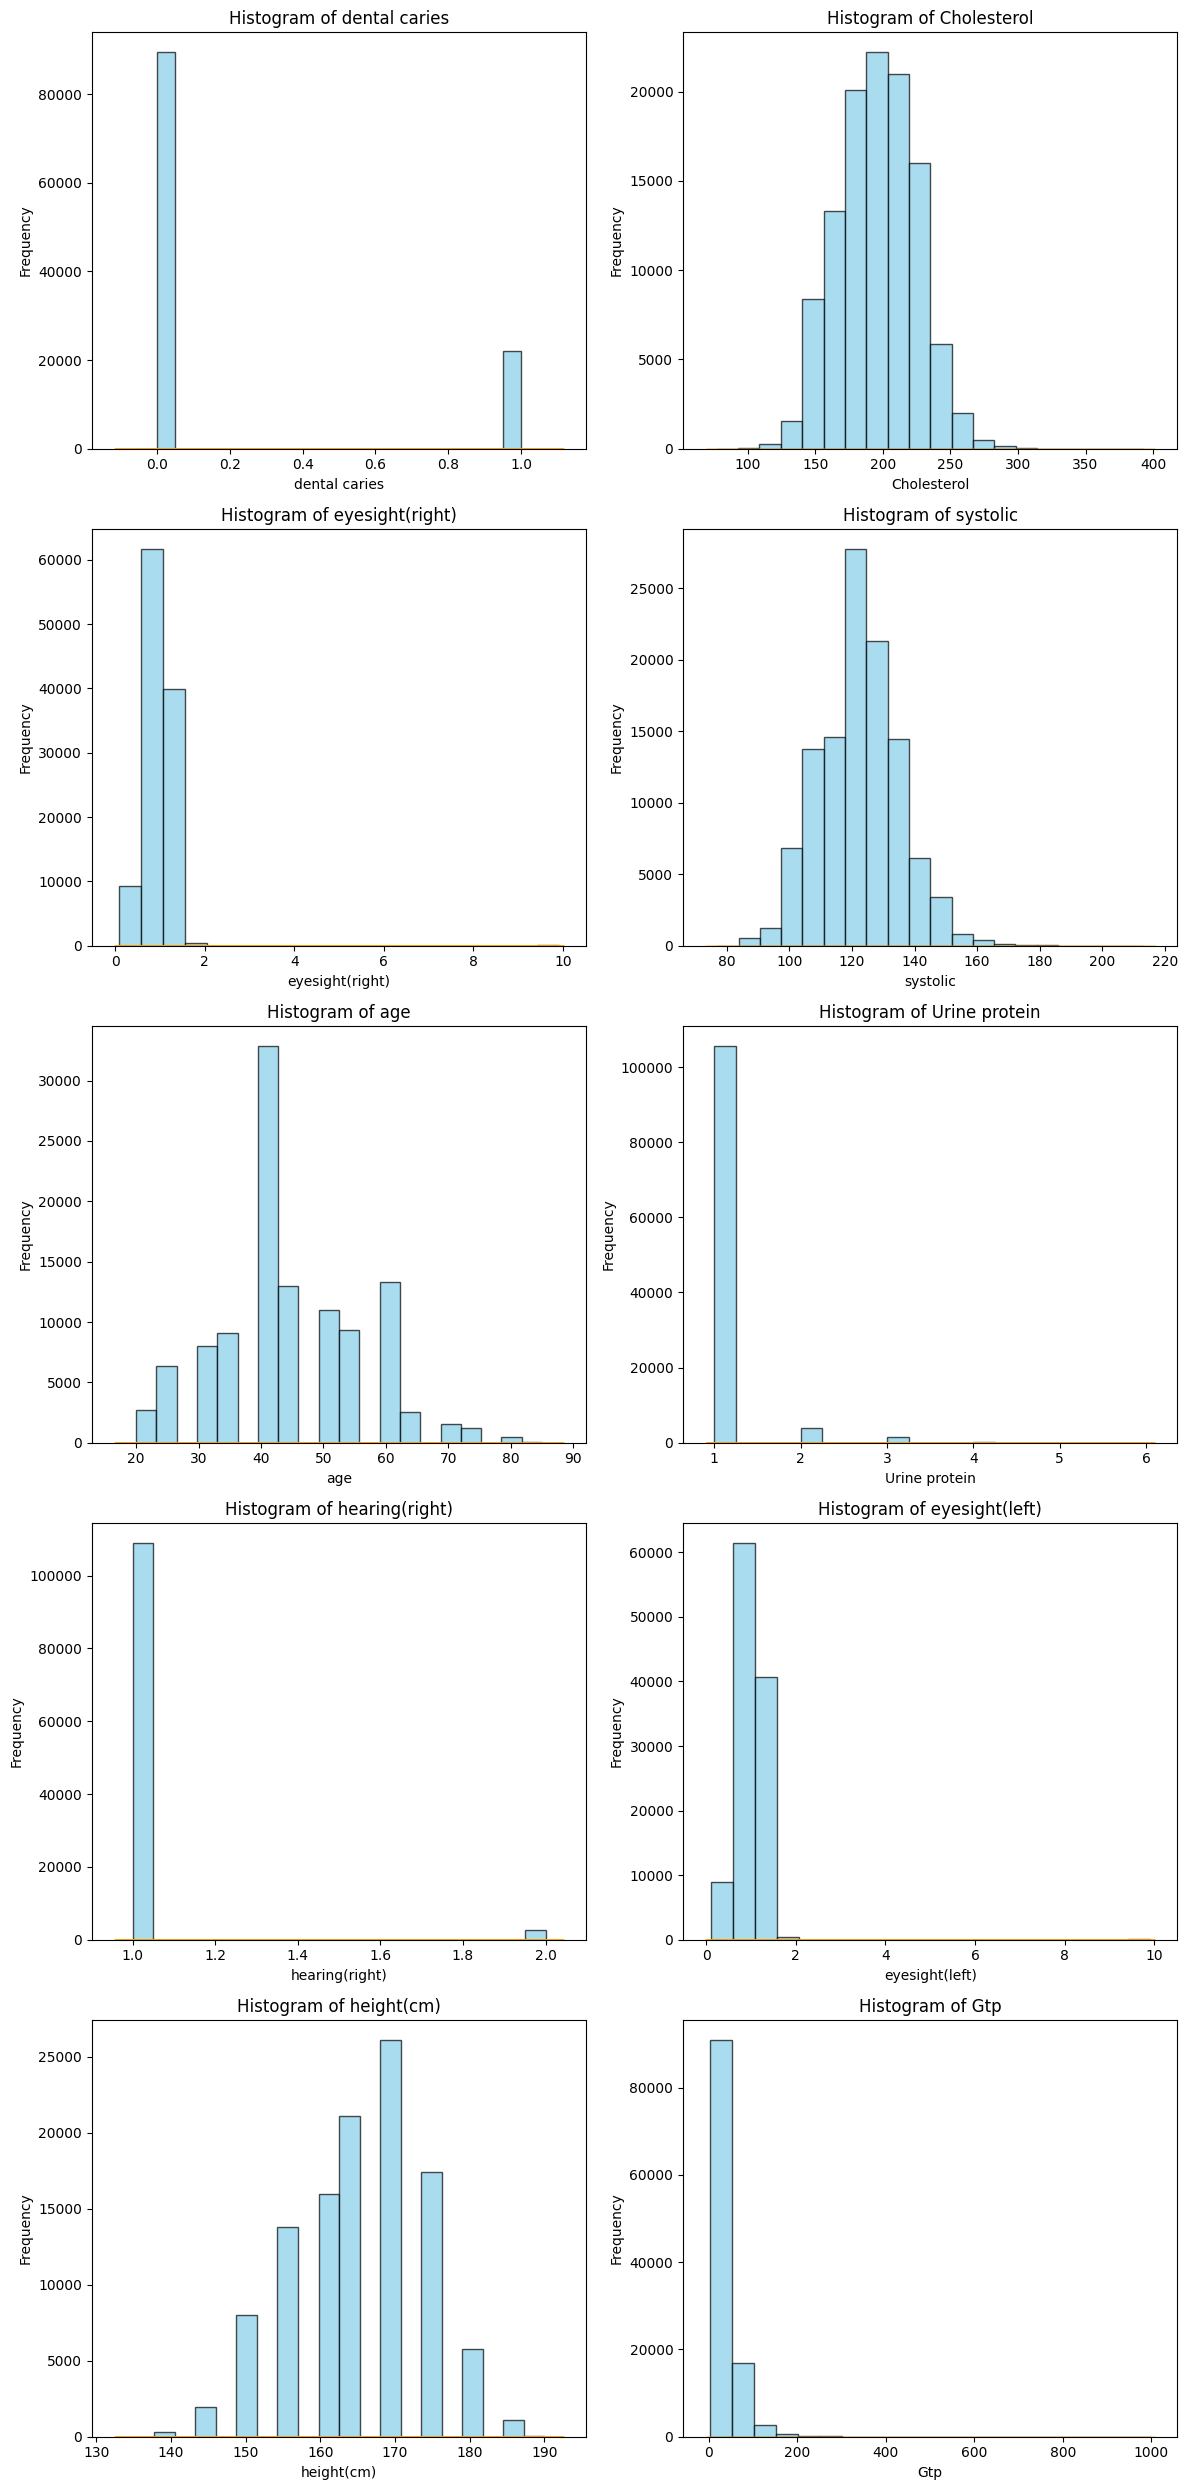

In [4]:
# Function to perform univariate analysis on the dataset
def univariate_analysis(df):
    # Calculate the number of rows and columns for the subplots
    num_plots = len(df.columns)
    num_rows = int(num_plots / 2) + (num_plots % 2 > 0)
    num_cols = min(2, num_plots)

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))
    axes = axes.flatten()

    # Iterate over each feature and create subplots with histogram and seaborn plot
    for i, feature in enumerate(df.columns):
        ax = axes[i]

        # Histogram
        ax.hist(df[feature], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        ax.set_title(f'Histogram of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')

        # Seaborn plot with KDE
        sns.kdeplot(data=df, x=feature, ax=ax, color='orange', fill=True)

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

# Call the updated univariate analysis function for the training dataset
univariate_analysis(X_train)

 # Bivariate Analysis Function

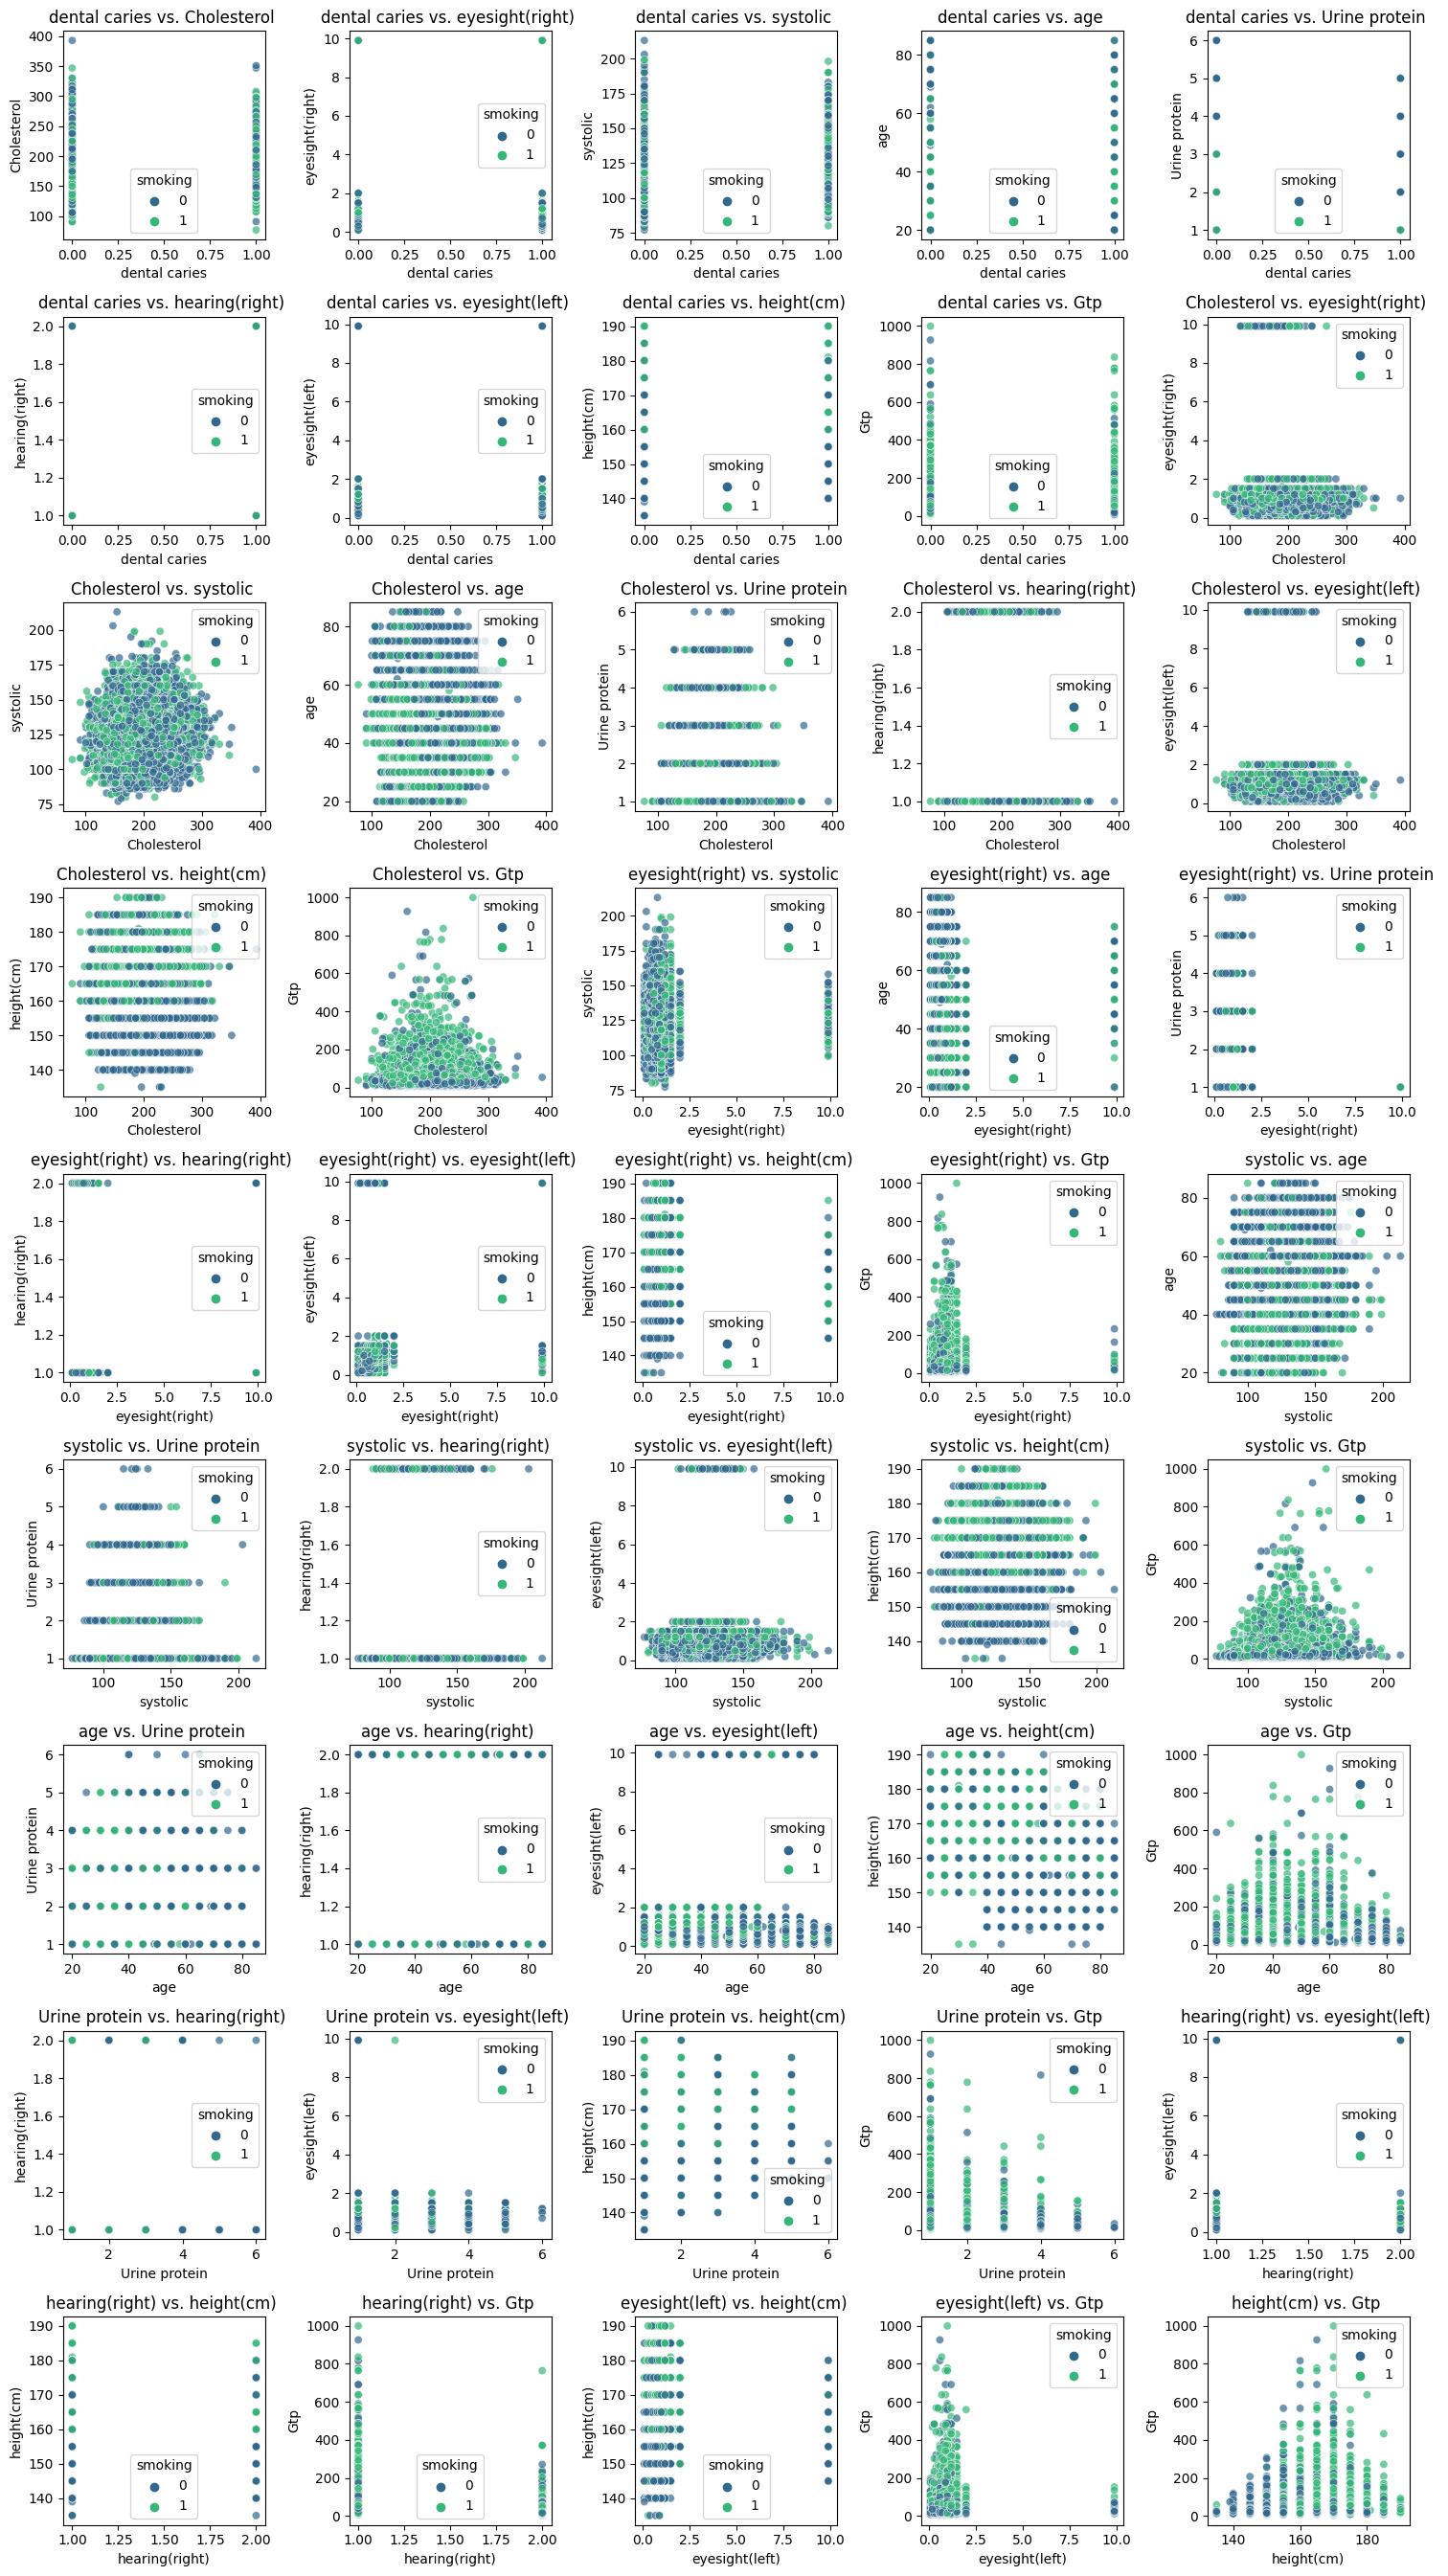

In [5]:
# Function to perform bivariate analysis for each pair of features
def bivariate_analysis_pairs(df):
    target_column = 'smoking'  # Target column name

    features = [col for col in df.columns if col != target_column]

    feature_pairs = list(itertools.combinations(features, 2))

    num_plots = len(feature_pairs)
    num_rows = int(num_plots / 5) + (num_plots % 5 > 0)
    num_cols = min(5, num_plots)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3 * num_rows))
    axes = axes.flatten()

    global y_train

    df_full = df.join(y_train)

    for i, pair in enumerate(feature_pairs):
        ax = axes[i]
        sns.scatterplot(data=df_full, x=pair[0], y=pair[1], hue=target_column, palette='viridis', alpha=0.7, ax=ax)
        ax.set_title(f'{pair[0]} vs. {pair[1]} ')
        ax.set_xlabel(pair[0])
        ax.set_ylabel(pair[1])
        ax.legend(title=target_column)

    plt.tight_layout()
    plt.show()

# Call the bivariate analysis function for the training dataset
bivariate_analysis_pairs(X_train)

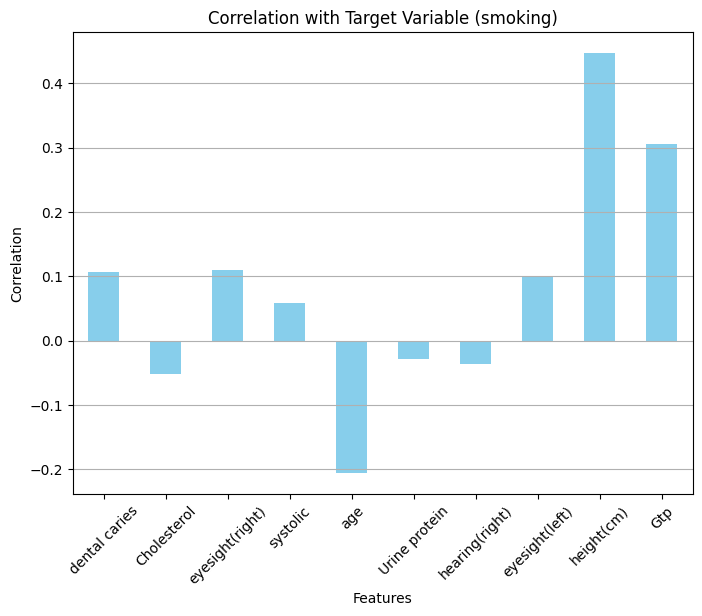

In [7]:
# Calculate the correlation matrix between numerical features and the target variable
corr_with_target = df.corr()['smoking'].drop('smoking')

# Plotting the correlation values as a bar plot
plt.figure(figsize=(8, 6))
corr_with_target.plot(kind='bar', color='skyblue')
plt.title("Correlation with Target Variable (smoking)")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Multivariate Analysis Function

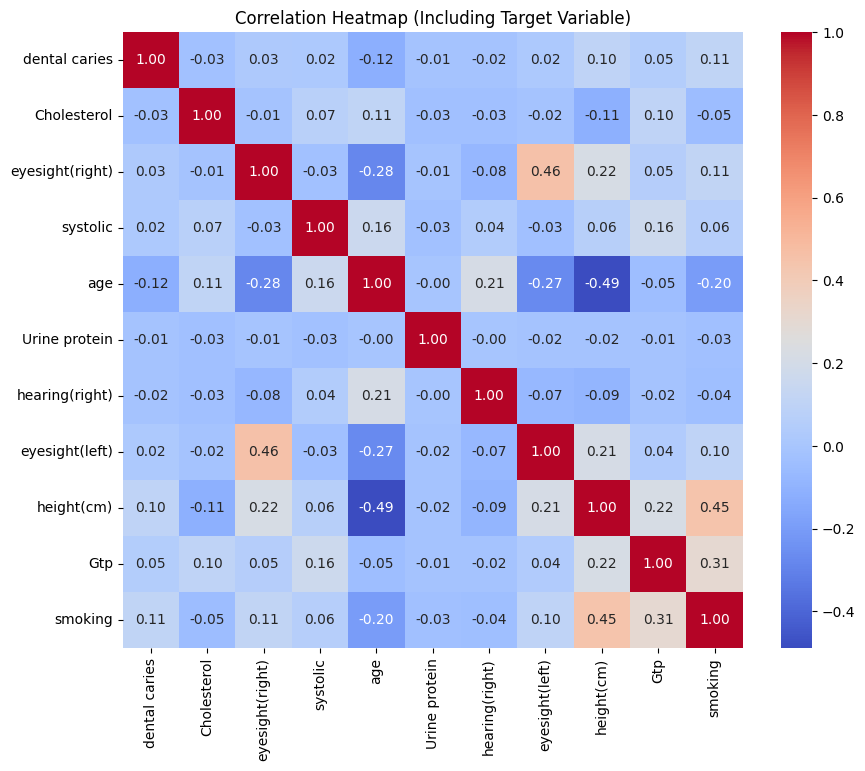

In [8]:
def multivariate_analysis(df):
    df_with_target = df.join(y_train)
    # Correlation heatmap including the target variable
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_with_target.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap (Including Target Variable)')
    plt.show()
# Call the multivariate analysis function for the training dataset
multivariate_analysis(X_train)

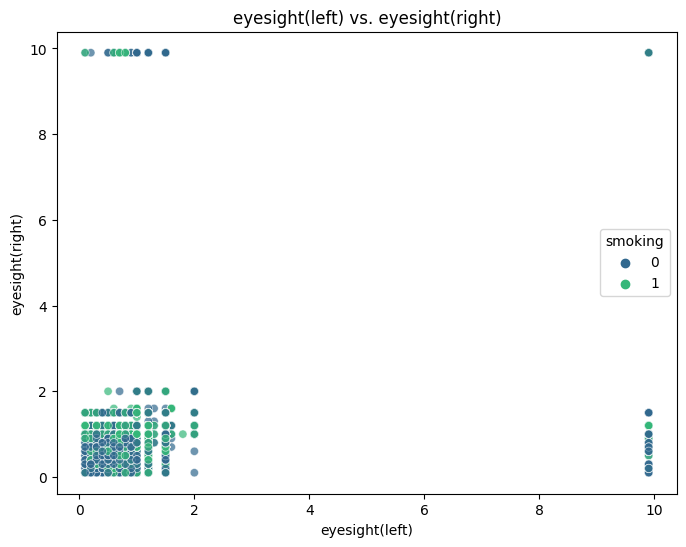

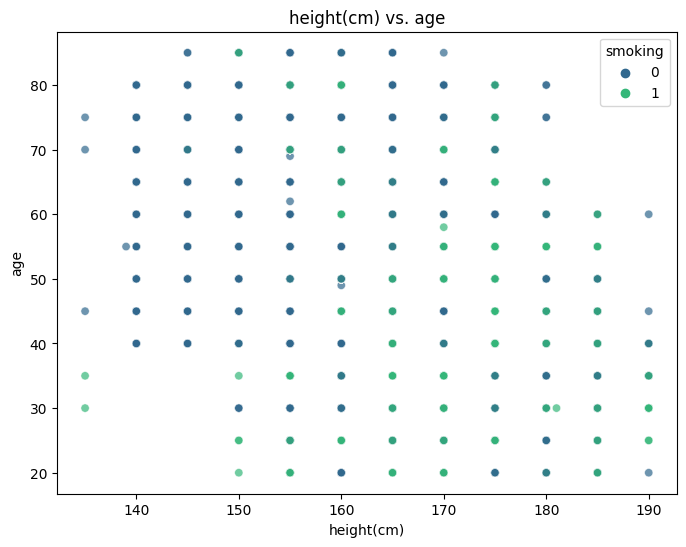

In [9]:
import os

def bivariate_analysis_selected_pairs(df, target_column='smoking', save_path='scatter_plots'):
    selected_pairs = [('eyesight(left)', 'eyesight(right)'), ('height(cm)', 'age')]

    # Create the directory to save scatter plots
    os.makedirs(save_path, exist_ok=True)

    global y_train
    df_full = df.join(y_train)

    for pair in selected_pairs:
        plt.figure(figsize=(8, 6))
        ax = sns.scatterplot(data=df_full, x=pair[0], y=pair[1], hue=target_column, palette='viridis', alpha=0.7)
        ax.set_title(f'{pair[0]} vs. {pair[1]}')
        ax.set_xlabel(pair[0])
        ax.set_ylabel(pair[1])
        ax.legend(title=target_column)

        # Save each scatter plot as an image file
        plt.savefig(f'{save_path}/scatter_plot_{pair[0]}_{pair[1]}.png')
        plt.show()

# Call the bivariate analysis function for the training dataset and save scatter plots
bivariate_analysis_selected_pairs(X_train)


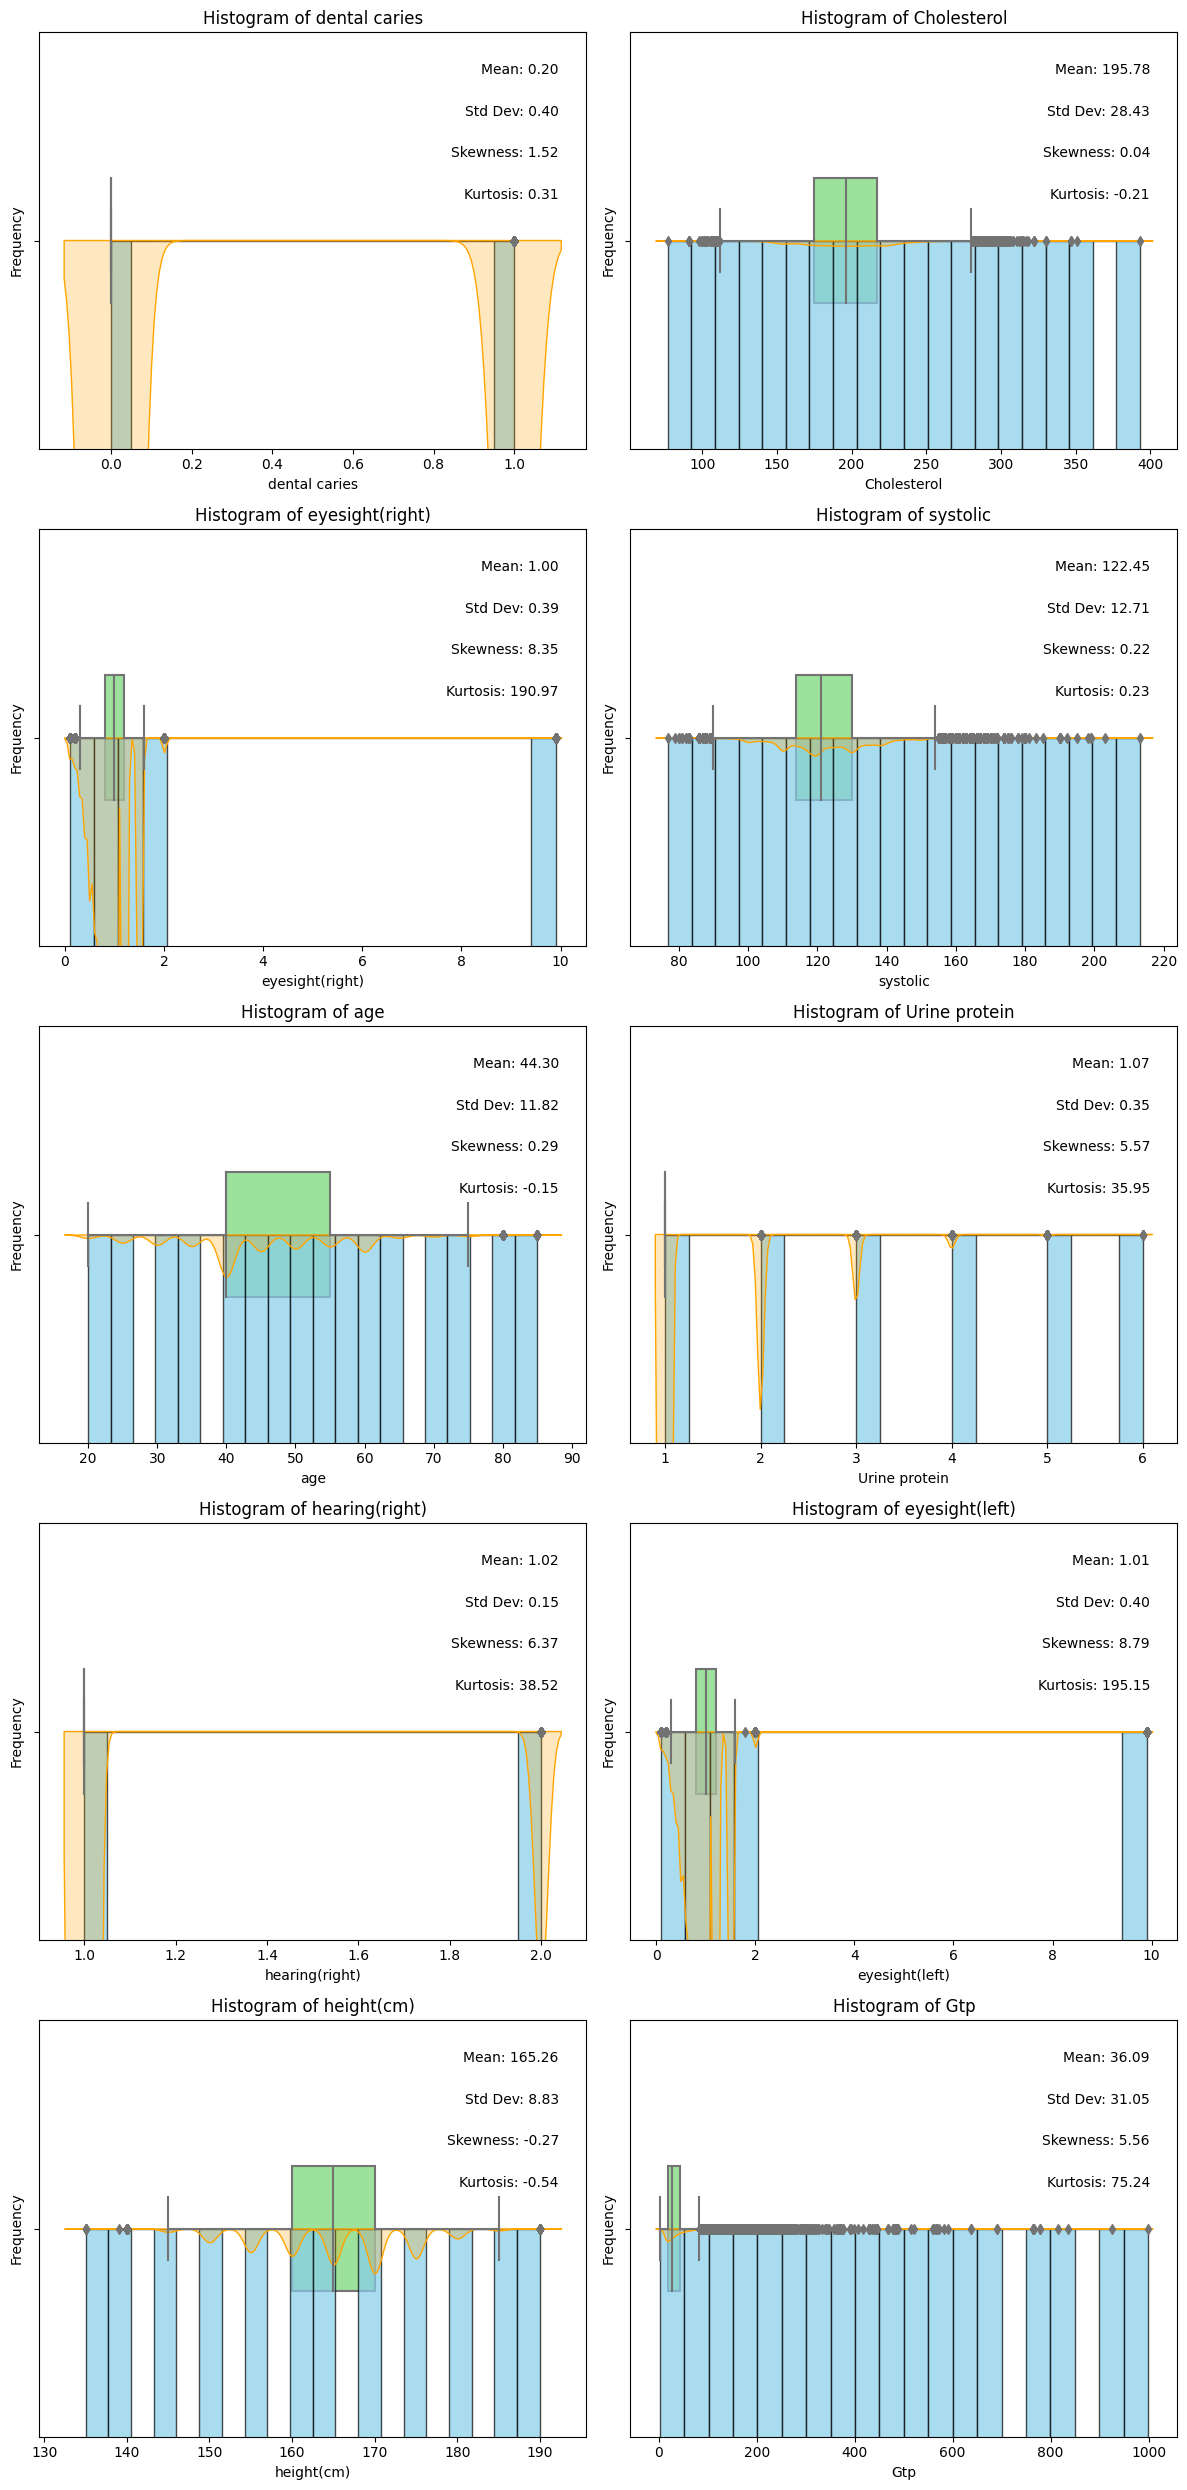

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def univariate_analysis(df):
    # Calculate the number of rows and columns for the subplots
    num_plots = len(df.columns)
    num_rows = int(num_plots / 2) + (num_plots % 2 > 0)
    num_cols = min(2, num_plots)

    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))
    axes = axes.flatten()

    # Iterate over each feature and create subplots with histogram, KDE plot, and box plot
    for i, feature in enumerate(df.columns):
        ax = axes[i]

        # Histogram
        ax.hist(df[feature], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
        ax.set_title(f'Histogram of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Frequency')

        # Seaborn plot with KDE
        sns.kdeplot(data=df, x=feature, ax=ax, color='orange', fill=True)
        # Additional information
        descriptive_stats = df[feature].describe()
        skewness = df[feature].skew()
        kurt = df[feature].kurt()

        ax.text(0.95, 0.9, f"Mean: {descriptive_stats['mean']:.2f}", transform=ax.transAxes, ha='right')
        ax.text(0.95, 0.8, f"Std Dev: {descriptive_stats['std']:.2f}", transform=ax.transAxes, ha='right')
        ax.text(0.95, 0.7, f"Skewness: {skewness:.2f}", transform=ax.transAxes, ha='right')
        ax.text(0.95, 0.6, f"Kurtosis: {kurt:.2f}", transform=ax.transAxes, ha='right')

        # Box plot
        sns.boxplot(x=df[feature], ax=ax, color='lightgreen', width=0.3)

    # Adjust layout to prevent overlapping
    plt.tight_layout()
    plt.show()

# Call the updated univariate analysis function for the training dataset
univariate_analysis(X_train)
